# Enron EDA

## 1. Loading the dataset

In [33]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

In [199]:
df = pd.DataFrame.from_records(list(data_dict.values()), index=data_dict.keys())
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299,29,38,1,...,NaN,1740,False,585062,NaN,365788,702,807,1061827,585062
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
ELLIOTT STEVEN,350000,NaN,-400729,NaN,steven.elliott@enron.com,4890344,78552,NaN,NaN,NaN,...,NaN,12961,False,1788391,NaN,170941,NaN,NaN,211725,6678735
CORDES WILLIAM R,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850,NaN,12,10,0,...,NaN,NaN,False,386335,NaN,NaN,58,764,NaN,1038185
HANNON KEVIN P,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,NaN,243293,1035,1045,288682,6391065


## 2. Dataframe stats

#### 2.1 Number of 'NaN'

In [71]:
def counts(col, tag):
    counter = 0
    for each in col:
        if each == tag:
            counter += 1
    return counter
df.apply(lambda col: counts(col, 'NaN'), axis=0)

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
email_address                 35
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64

#### 2.2 Datatype Count

In [80]:
pd.DataFrame(df.dtypes, columns=['Acutal Type'])

,Acutal Type
bonus,object
deferral_payments,object
deferred_income,object
director_fees,object
email_address,object
exercised_stock_options,object
expenses,object
from_messages,object
from_poi_to_this_person,object
from_this_person_to_poi,object


#### 2.3 Dataframe Memory Usage

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null bool
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null object

## Data Pattern

#### POI counts

In [119]:
POI_type = {'POI': len(df[df.poi == True]), 
            'non POIs': len(df[df.poi == False])}
pd.DataFrame(list(POI_type.items()), 
             columns=['Class', 'Counts'])

,Class,Counts
0,POI,18
1,non POIs,128


## Correlation

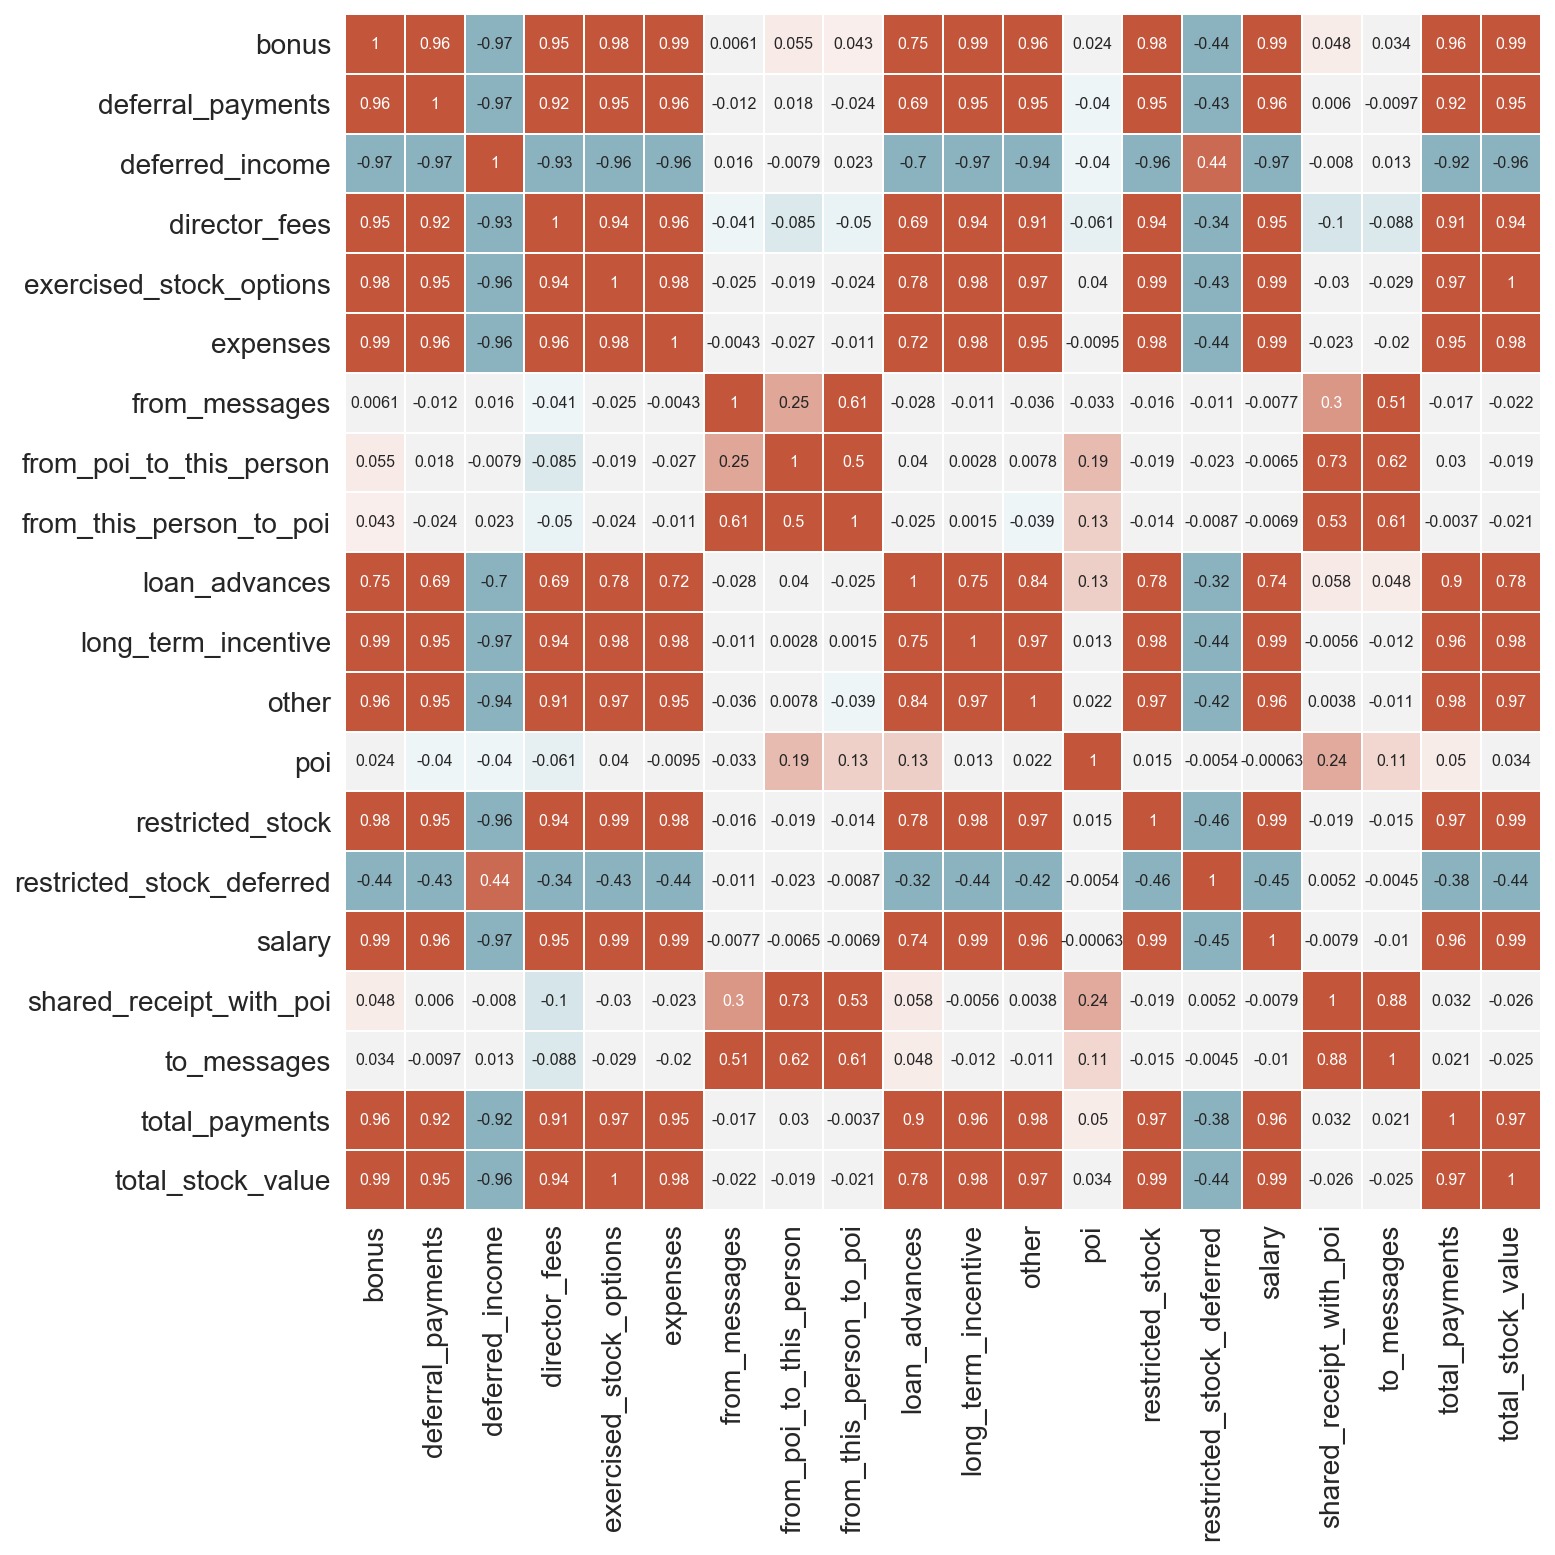

In [198]:
sns.set(font_scale=1.4)
f, ax = plt.subplots(figsize=(14, 11))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
ax = sns.heatmap(df.corr(), cmap=cmap, vmax=.5, vmin=-.3, center=0,
            square=True, linewidths=.5, cbar=0,
           annot=True, annot_kws={"size":8})
plt.show()